In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#metrics
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
#for handling warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('student_kmeans_dataset.csv')

In [3]:
print(df.head())

   Student_ID  Study_Hours  Exam_Score
0           1            2          20
1           2            3          25
2           3            4          28
3           4            6          45
4           5            7          50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Student_ID   12 non-null     int64
 1   Study_Hours  12 non-null     int64
 2   Exam_Score   12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


[2 2 2 0 0 0 0 0 1 1 1 1]


Text(0.5, 1.0, 'K-means Clustering')

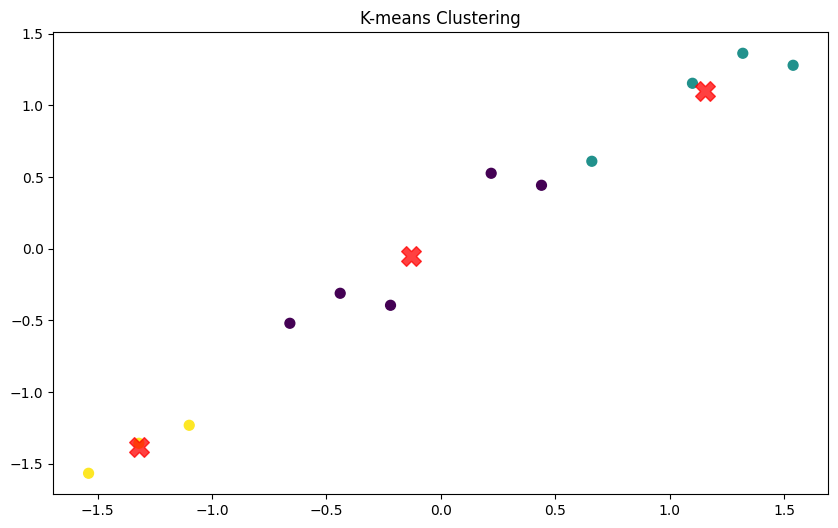

In [20]:
#kmeans clustering
X = df.iloc[:,1:3].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
print(y_kmeans)
df['Cluster'] = y_kmeans
#visualization
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering')

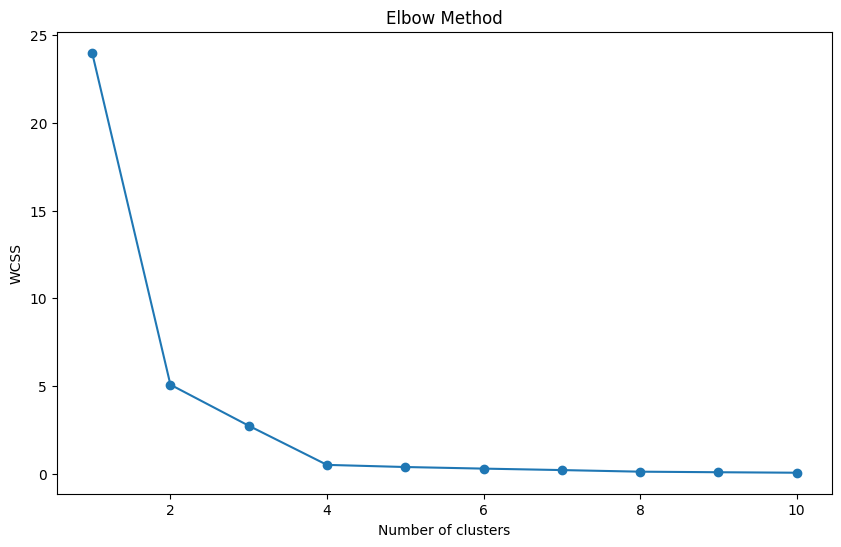

In [ ]:
#wcss elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print("From the elbow method, the optimal number of clusters appears to be 3.")

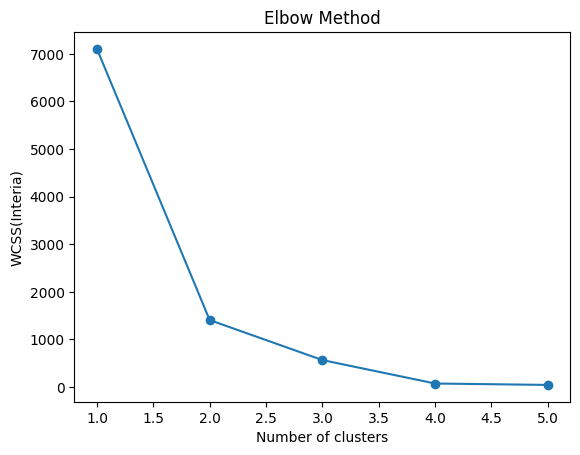

In [18]:
X1 = df.iloc[:,1:3].values
#Elbow method
wcss1=[]
for k in range(1,6):
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)
plt.plot(range(1,6),wcss1,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS(Interia)')
plt.show()

   Student_ID  Study_Hours  Exam_Score  Cluster
0           1            2          20        2
1           2            3          25        2
2           3            4          28        2
3           4            6          45        0
4           5            7          50        0
Cluster
1    6
2    3
0    3
Name: count, dtype: int64


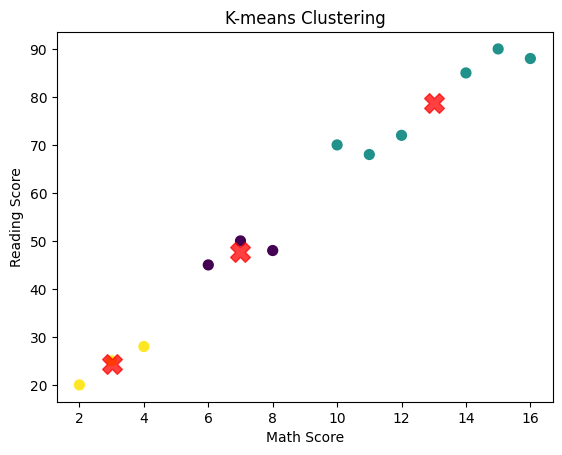

In [21]:
kmeans=KMeans(n_clusters=3,random_state=42,n_init=10)
df['Cluster']=kmeans.fit_predict(X1)
print(df.head())
print(df['Cluster'].value_counts())
#visualization
plt.scatter(X1[:,0],X1[:,1],c=df['Cluster'],s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.75,marker='X')
plt.title('K-means Clustering')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

In [24]:
#Features of Clusters
print(df.groupby('Cluster').mean())

         Student_ID  Study_Hours  Exam_Score
Cluster                                     
0               5.0          7.0   47.666667
1               9.5         13.0   78.833333
2               2.0          3.0   24.333333


In [23]:
#Silhouette Score
silhouette_avg=silhouette_score(X1,df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')
silhouette_vals=silhouette_samples(X1,df['Cluster'])
print(f'Silhouette Values: {silhouette_vals}')
#Davies-Bouldin Index
db_index=davies_bouldin_score(X1,df['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')
#Calinski-Harabasz Index
ch_index=calinski_harabasz_score(X1,df['Cluster'])
print(f'Calinski-Harabasz Index: {ch_index}')

Silhouette Score: 0.6919344032180659
Silhouette Values: [0.76273017 0.82061179 0.71343579 0.79162032 0.85882369 0.8792537
 0.46613321 0.35757544 0.55859424 0.71231888 0.68176621 0.70034941]
Davies-Bouldin Index: 0.306915641948814
Calinski-Harabasz Index: 51.955328230791864
